<a href="https://colab.research.google.com/github/arc-grg/Mask-No-mask-with-improper-mask/blob/master/Mask_No_Mask_With_Improper_Mask_with_Data_Augmentation_and_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
with_mask_filepath = "/content/drive/My Drive/COVID Go dataset/With mask"
with_improper_mask_filepath = "/content/drive/My Drive/COVID Go dataset/With improper mask"
without_mask_filepath = "/content/drive/My Drive/COVID Go dataset/without mask"
train_dir = "/content/drive/My Drive/COVID Go dataset/Train"
train_with_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Train/With mask"
train_with_improper_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Train/With improper mask"
train_without_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Train/Without mask"
validation_dir = "/content/drive/My Drive/COVID Go dataset/Validation"
validation_with_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Validation/With mask"
validation_with_improper_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Validation/With improper mask"
validation_without_mask_filepath = "/content/drive/My Drive/COVID Go dataset/Validation/Without mask"

In [4]:
num_with_mask = len(os.listdir(with_mask_filepath))
num_with_improper_mask = len(os.listdir(with_improper_mask_filepath))
num_without_mask = len(os.listdir(without_mask_filepath))

train_num_with_mask = len(os.listdir(train_with_mask_filepath))
train_num_with_improper_mask = len(os.listdir(train_with_improper_mask_filepath))
train_num_without_mask = len(os.listdir(train_without_mask_filepath))

validation_num_with_mask = len(os.listdir(validation_with_mask_filepath))
validation_num_with_improper_mask = len(os.listdir(validation_with_improper_mask_filepath))
validation_num_without_mask = len(os.listdir(validation_without_mask_filepath))

total_train = train_num_with_mask + train_num_with_improper_mask + train_num_without_mask

total_val = validation_num_with_mask + validation_num_with_improper_mask + validation_num_without_mask

In [5]:
print("Total Train images:",total_train)
print("Total validation images:",total_val)
print()
print("Total With Mask images in train:",train_num_with_mask)
print("Total With Improper Mask images in train:",train_num_with_improper_mask)
print("Total Without Mask images in train:",train_num_without_mask)
print()
print("Total With Mask images in validation:",validation_num_with_mask)
print("Total With Improper Mask images in validation:",validation_num_with_improper_mask)
print("Total Without Mask images in validation:",validation_num_without_mask)


Total Train images: 4462
Total validation images: 589

Total With Mask images in train: 1463
Total With Improper Mask images in train: 1499
Total Without Mask images in train: 1500

Total With Mask images in validation: 189
Total With Improper Mask images in validation: 200
Total Without Mask images in validation: 200


In [6]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Flipping The Image.

In [8]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 4462 images belonging to 3 classes.


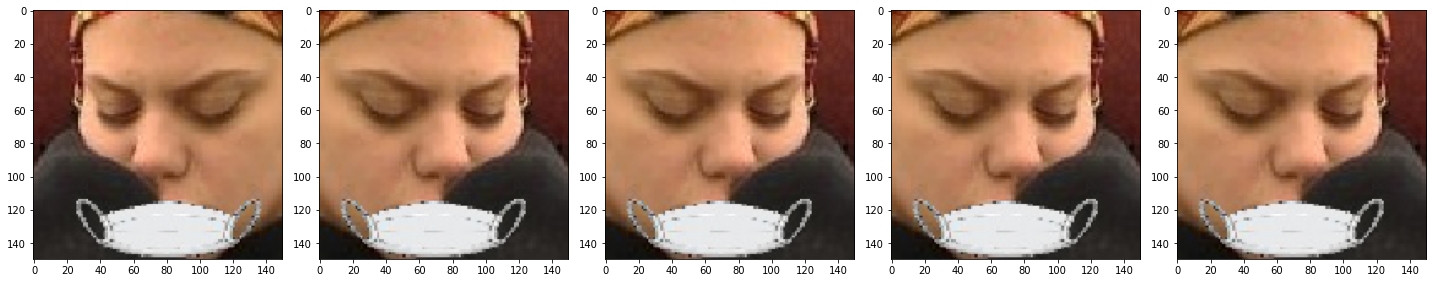

In [9]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Rotating the Image

In [10]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 4462 images belonging to 3 classes.


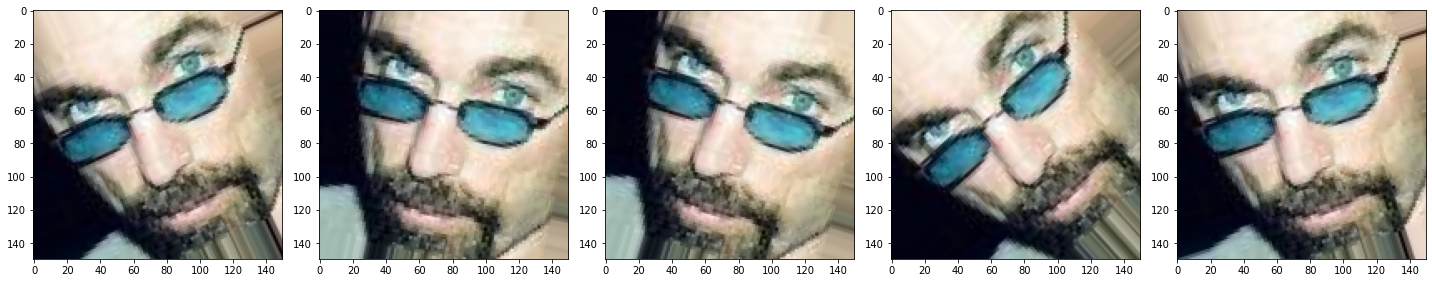

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Applying Zoom

In [12]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 4462 images belonging to 3 classes.


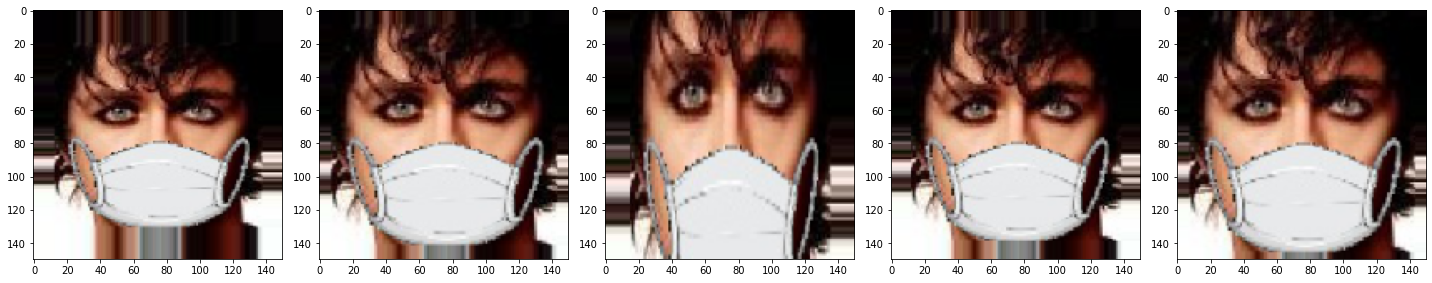

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Putting it all together.

In [14]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')

Found 4462 images belonging to 3 classes.


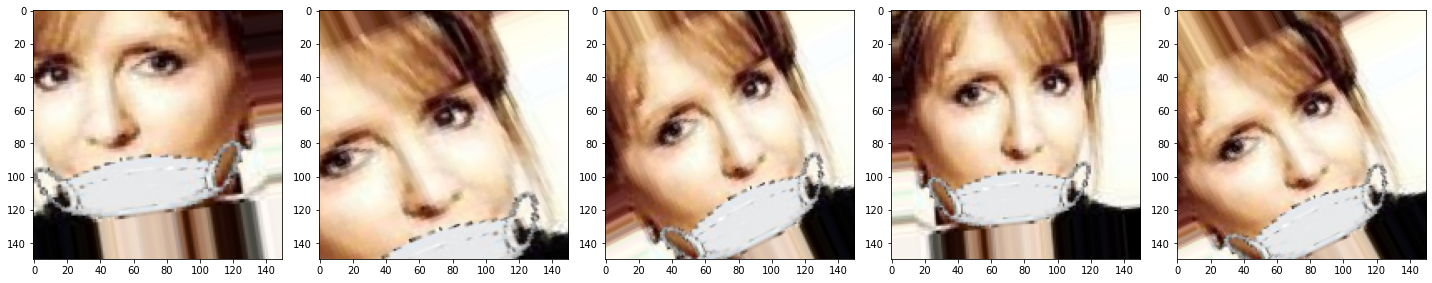

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Creating Validation Data Generator.

In [16]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')                                                 

Found 589 images belonging to 3 classes.


## Defining the Model

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

## Train the model

In [20]:
epochs=10
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/10
45/45 [==============================] - 1246s 28s/step - loss: 0.8940 - accuracy: 0.6331 - val_loss: 0.6082 - val_accuracy: 0.9440
Epoch 2/10
45/45 [==============================] - 29s 653ms/step - loss: 0.7925 - accuracy: 0.7506 - val_loss: 0.6146 - val_accuracy: 0.9508
Epoch 3/10
45/45 [==============================] - 29s 640ms/step - loss: 0.7101 - accuracy: 0.8377 - val_loss: 0.6039 - val_accuracy: 0.9491
Epoch 4/10
45/45 [==============================] - 29s 636ms/step - loss: 0.6588 - accuracy: 0.8931 - val_loss: 0.5709 - val_accuracy: 0.9830
Epoch 5/10
45/45 [==============================] - 28s 631ms/step - loss: 0.6474 - accuracy: 0.9009 - val_loss: 0.5879 - val_accuracy: 0.9643
Epoch 6/10
45/45 [==============================] - 28s 631ms/step - loss: 0.6218 - accuracy: 0.9287 - val_loss: 0.5708 - val_accuracy: 0.9796
Epoch 7/10
45/45 [==============================] - 28s 625ms/step - loss: 0.6118 - accuracy: 0.9388 - val_loss: 0.5606 - val_accuracy: 0.9915

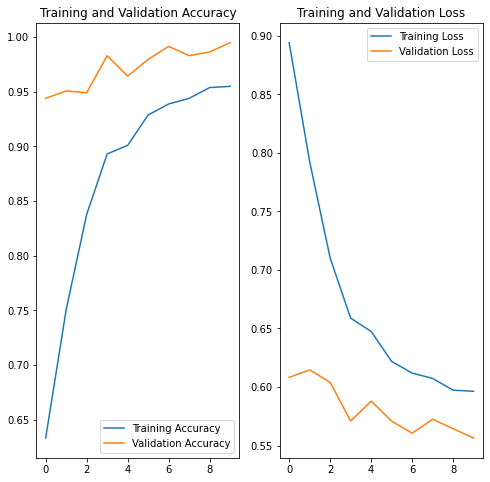

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
epochs=10
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/10
45/45 [==============================] - 29s 654ms/step - loss: 0.5952 - accuracy: 0.9561 - val_loss: 0.5616 - val_accuracy: 0.9915
Epoch 2/10
45/45 [==============================] - 30s 668ms/step - loss: 0.5883 - accuracy: 0.9626 - val_loss: 0.5555 - val_accuracy: 0.9966
Epoch 3/10
45/45 [==============================] - 30s 676ms/step - loss: 0.5902 - accuracy: 0.9617 - val_loss: 0.5958 - val_accuracy: 0.9525
Epoch 4/10
45/45 [==============================] - 29s 653ms/step - loss: 0.5873 - accuracy: 0.9646 - val_loss: 0.5615 - val_accuracy: 0.9881
Epoch 5/10
45/45 [==============================] - 29s 653ms/step - loss: 0.5795 - accuracy: 0.9733 - val_loss: 0.5558 - val_accuracy: 0.9949
Epoch 6/10
45/45 [==============================] - 29s 642ms/step - loss: 0.5723 - accuracy: 0.9785 - val_loss: 0.5591 - val_accuracy: 0.9932
Epoch 7/10
45/45 [==============================] - 29s 655ms/step - loss: 0.5755 - accuracy: 0.9756 - val_loss: 0.5581 - val_accuracy: 0.9932

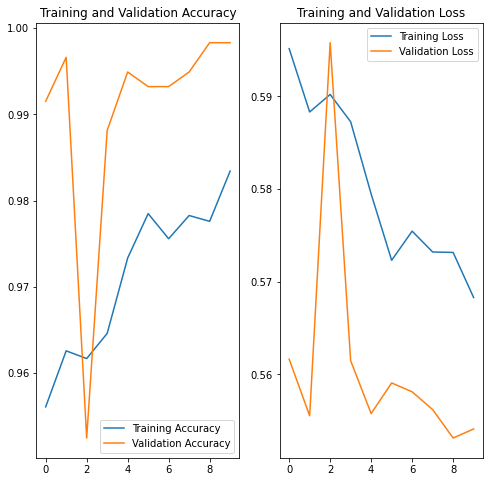

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()